In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from heapq import nlargest, nsmallest
import matplotlib.colors as colors
from infomap import Infomap
from copy import deepcopy

In [2]:
# retrieving the data
edges = pd.read_csv('connections.txt', delimiter=' ', names=['from', 'to'])
edges

from    to
0         0     1
1         0     2
2         0     3
3         0     4
4         0     5
...     ...   ...
88229  4026  4030
88230  4027  4031
88231  4027  4032
88232  4027  4038
88233  4031  4038

[88234 rows x 2 columns]

In [3]:
# 1
# creating the directed graph
G = nx.DiGraph()
G.add_edges_from(np.array(edges))

In [4]:
# 2
# the visualization is very messy due to the size of the data, so it is not very demonstrative and takes 
# very long to run
# nx.draw_networkx(G)

In [5]:
# as there are too many of therm, here are the top 10 bridge nodes
betweenness = nx.betweenness_centrality(G)
bridges = nlargest(10, betweenness, key=betweenness.get)
for i in bridges:
    print(f'Node {i}: Betweenness {betweenness[i]}')

Node 1684: Betweenness 0.03299985344063623
Node 1912: Betweenness 0.027145672353148857
Node 1718: Betweenness 0.026577614223444346
Node 563: Betweenness 0.01300961569074186
Node 1405: Betweenness 0.010123670299605515
Node 1656: Betweenness 0.009425937129610911
Node 1086: Betweenness 0.008553563518788857
Node 567: Betweenness 0.008300375906658487
Node 3437: Betweenness 0.008194350620311139
Node 119: Betweenness 0.006358997369476009


In [6]:
# 3
nx.density(G)

0.0054099817517196435

not many edges are connected, thus the graph is not dense

In [7]:
# 4
# top 5 most connected nodes
degrees = dict(G.degree)
highest_degrees = nlargest(5, degrees, key = degrees.get)
for i in highest_degrees:
    print(f'Node {i}: Degree {degrees[i]}')

Node 107: Degree 1045
Node 1684: Degree 792
Node 1912: Degree 755
Node 3437: Degree 547
Node 0: Degree 347


In [8]:
# As there are no nodos with no connections, here are the nodes with one 
lowest_degrees = [{i:degrees[i]} for i in degrees if degrees[i] <= 1]
print(lowest_degrees)

[{11: 1}, {12: 1}, {15: 1}, {18: 1}, {37: 1}, {43: 1}, {74: 1}, {114: 1}, {209: 1}, {210: 1}, {215: 1}, {287: 1}, {292: 1}, {335: 1}, {911: 1}, {918: 1}, {1096: 1}, {1119: 1}, {1145: 1}, {1206: 1}, {1386: 1}, {1466: 1}, {1560: 1}, {1581: 1}, {1834: 1}, {358: 1}, {447: 1}, {550: 1}, {585: 1}, {602: 1}, {607: 1}, {608: 1}, {613: 1}, {624: 1}, {638: 1}, {668: 1}, {674: 1}, {692: 1}, {801: 1}, {875: 1}, {883: 1}, {891: 1}, {892: 1}, {2842: 1}, {3031: 1}, {3071: 1}, {3183: 1}, {3230: 1}, {2079: 1}, {2195: 1}, {2269: 1}, {2457: 1}, {2470: 1}, {2569: 1}, {2596: 1}, {3451: 1}, {3453: 1}, {3570: 1}, {3650: 1}, {3709: 1}, {3729: 1}, {3748: 1}, {3798: 1}, {3820: 1}, {3853: 1}, {3856: 1}, {3935: 1}, {3974: 1}, {3984: 1}, {4008: 1}, {4010: 1}, {4015: 1}, {4022: 1}, {4024: 1}, {4035: 1}]


In [9]:
# 5
in_degrees = dict(G.in_degree)
highest_IN_degrees = nlargest(5, in_degrees, key = in_degrees.get)

print("highest incoming degrees")
for i in highest_IN_degrees:
    print(f'Node {i}: Degree {in_degrees[i]}')

highest incoming degrees
Node 1888: Degree 251
Node 2543: Degree 246
Node 1800: Degree 216
Node 2611: Degree 197
Node 1827: Degree 186


In [10]:
out_degrees = dict(G.out_degree)
highest_OUT_degrees = nlargest(5, out_degrees, key = out_degrees.get)
    
print("highest outgoing degrees")
for i in highest_OUT_degrees:
    print(f'Node {i}: Degree {out_degrees[i]}')

highest outgoing degrees
Node 107: Degree 1043
Node 1684: Degree 778
Node 1912: Degree 748
Node 3437: Degree 542
Node 0: Degree 347


In [11]:
# 6
# nodes with the highest closeness centrality
closeness_centrality = nx.closeness_centrality(G)
top_closeness_nodes = nlargest(5, closeness_centrality, key=closeness_centrality.get)
print("Top 5 nodes with the highest closeness centrality:", top_closeness_nodes)

Top 5 nodes with the highest closeness centrality: [2642, 2649, 2629, 2643, 2543]


Closeness centrality measures how close a node is to all other nodes in the network. Nodes with high closeness centrality are effectively close to many other nodes.

In [12]:
# nodes with the highest betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness_nodes = nlargest(5, betweenness_centrality, key=betweenness_centrality.get)
print("Top 5 nodes with the highest betweenness centrality:", top_betweenness_nodes)

Top 5 nodes with the highest betweenness centrality: [1684, 1912, 1718, 563, 1405]


In [13]:
# calculating eigenvector centralities
eigenvector_in = nx.eigenvector_centrality(G, max_iter=1000)
eigenvector_out = nx.eigenvector_centrality(G.reverse(), max_iter=1000)

eigenvector = {}
for key in eigenvector_in.keys():
    eigenvector[key] = (eigenvector_in[key] + eigenvector_out[key])/2

Betweenness centrality quantifies how often a node acts as a bridge along the shortest path between two other nodes. Nodes with high betweenness centrality play a crucial role in connecting different parts of the network.

In [14]:
# top 5 nodes with higest eigen vector
e_vec = nlargest(5, eigenvector, key=eigenvector.get)
for i in e_vec:
    print(f'Node {i}: Eigenvector {eigenvector[i]}')

Node 0: Eigenvector 0.4419361459191112
Node 2655: Eigenvector 0.401352149835326
Node 2654: Eigenvector 0.23993423112534548
Node 3: Eigenvector 0.1486317868904883
Node 9: Eigenvector 0.12565044899639224


Eigenvector centrality measures a node's influence in the network, taking into account the influence of its neighbors. Nodes with high eigenvector centrality are well connected to other nodes that are themselves well connected.

In [15]:
# 7
def findCommunities(G):
    im = Infomap("--two-level --directed")
    
    for e in G.edges():
        im.addLink(*e)
        
    print("Find communities with Infomap")
    im.run();
    print(f"Found {im.num_top_modules} communities with codelength: {im.codelength}")
    communities = {}
    
    for node in im.tree:
        communities[node.node_id] = node.module_id
        
    nx.set_node_attributes(G, communities,'community')
    return im.num_top_modules

In [16]:
print(findCommunities(G))

Find communities with Infomap
  Infomap v2.7.1 starts at 2023-12-14 00:15:18
  -> Input network: 
  -> No file output!
  -> Configuration: two-level
                    directed
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'directed'... Found 98 communities with codelength: 6.587416522147203

  -> Using unrecorded teleportation to links. 
  -> PageRank calculation done in 84 iterations.

  => Sum node flow: 1, sum link flow: 1
Build internal network with 4039 nodes and 88234 links...
  -> One-level codelength: 9.86597315

Trial 1/1 starting at 2023-12-14 00:15:18
Two-level compression: 33% 0.72% 0.0611712068% 0.0123350569% 98


The Infomap algorithm detected 98 communities in the graph.

The codelength is a measure of the quality of the community structure found by the algorithm. In this case, the total codelength is 6.587416522.

The algorithm found the best end modular solution in 2 levels.

The two-level compression achieved a compression rate of 33% at the first level, 0.72% at the second level, 0.0611712068% at the third level, and 0.0123350569% at the fourth level.

In [17]:
# 8
nodes_comm = dict((n, d["community"]) for n, d in G.nodes().items())
comms = np.array(list(nodes_comm.values()))
distinct_comms = np.unique(comms)

comm_count = {}
for com in distinct_comms:
    count = np.count_nonzero(comms == com)
    comm_count[com] = count

In [18]:
maximum = max(comm_count, key=comm_count.get)
print(f"Largest community is {maximum}, with {comm_count[maximum]} nodes")

Largest community is 5, with 432 nodes


This community is relatively large, consisting of 432 nodes.

Large communities may represent cohesive groups of nodes that are densely connected within the community, possibly indicating a specific functional or structural role in the network.

In [19]:
minimum = min(comm_count, key=comm_count.get)
print(f"Smallest community is {minimum}, with {comm_count[minimum]} nodes")

Smallest community is 38, with 2 nodes


This community is small, comprising only 2 nodes.

Small communities might represent more specialized or isolated groups of nodes with specific interactions or functions within the larger network.

The existence of both large and small communities suggests a heterogeneous structure in the network, where certain groups of nodes have strong internal connections, and others are more isolated or have weaker internal connections.

The choice of the number and size of communities can impact the interpretation of results. A balance needs to be struck between creating fine-grained communities and avoiding overly detailed subdivisions that might not have meaningful interpretations.

The identification of large communities might prompt further investigation into the specific role or function of those groups of nodes within the network.

The presence of small communities could indicate areas of interest for targeted analysis, as these might represent specialized or tightly interconnected subsets of nodes.

In [20]:
# 9
# 3 largest communities
larg3_com = nlargest(3, comm_count, key=comm_count.get)
for i in larg3_com:
    print(f'Community {i} with {comm_count[i]} nodes')

Community 5 with 432 nodes
Community 3 with 333 nodes
Community 2 with 271 nodes


In [21]:
selected_data5 = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 5)
selected_data3 = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 3)
selected_data2 = dict((n,d['community']) for n,d in G.nodes().items() if d['community'] == 2)


sg5 = G.subgraph(list(selected_data5.keys()))
sg3 = G.subgraph(list(selected_data3.keys()))
sg2 = G.subgraph(list(selected_data2.keys()))

In [22]:
graphs = [sg5, sg3, sg2]

def plot_graphs(graphs):
    for g in graphs:
        plt.figure(figsize=(15, 15))
        nx.draw_networkx(g)
    plt.show()

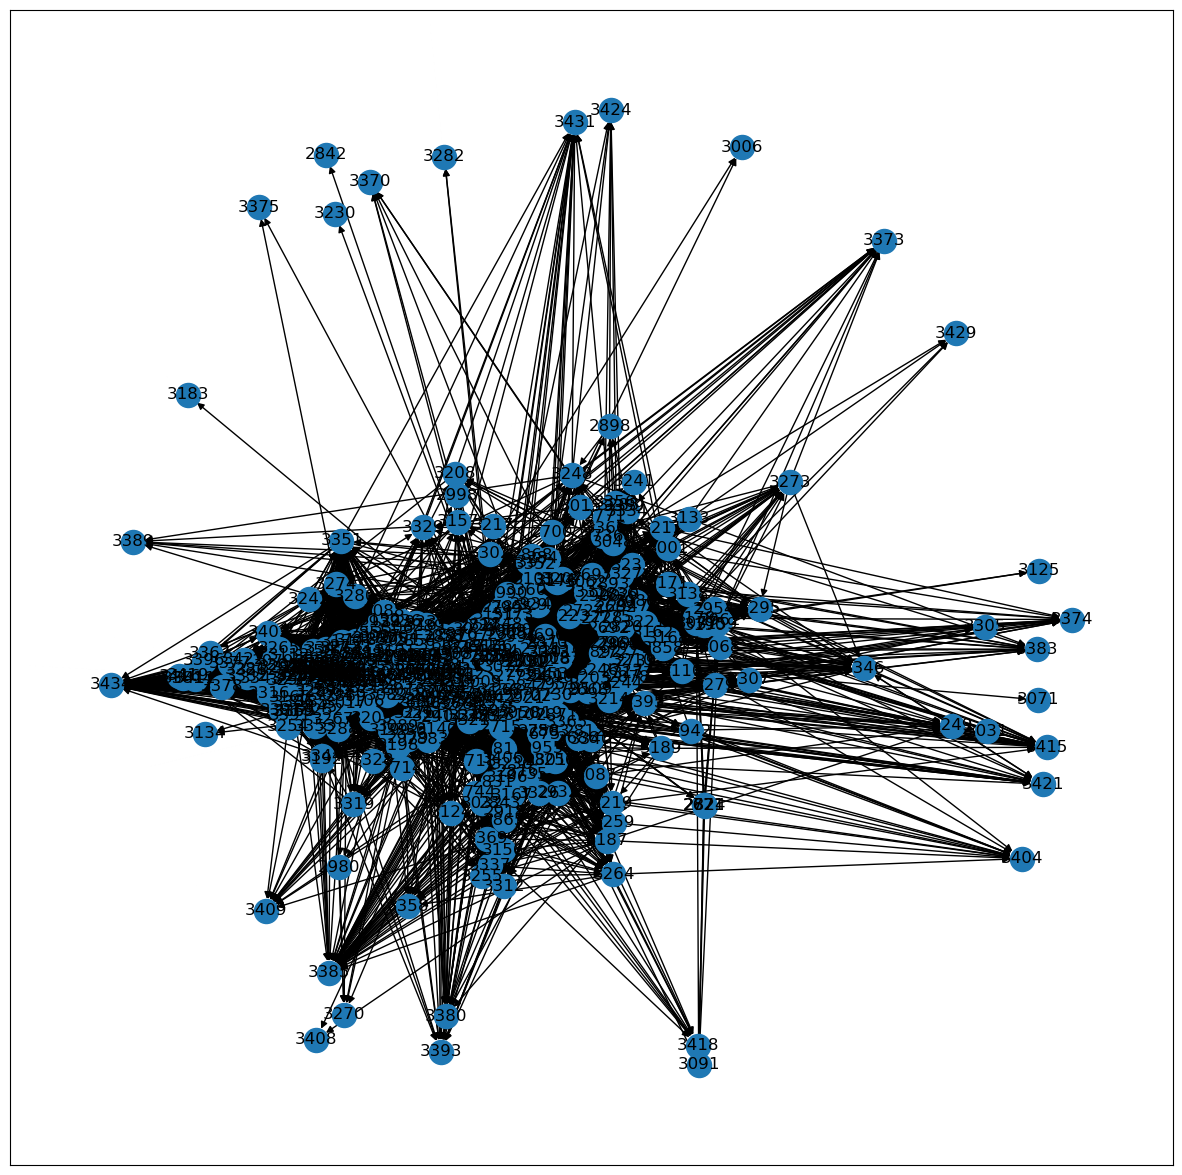

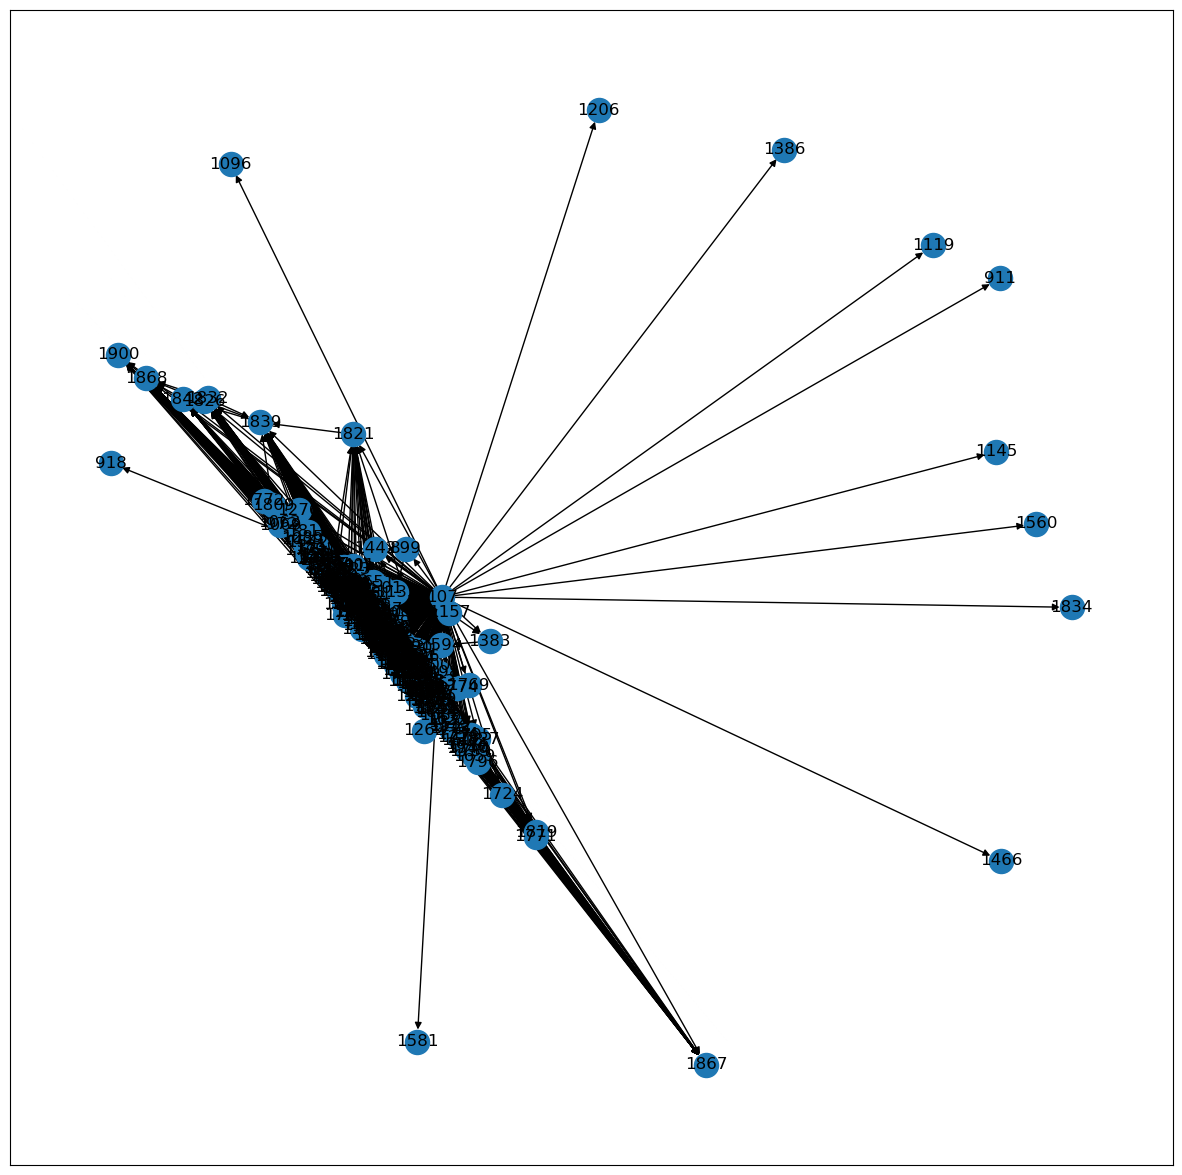

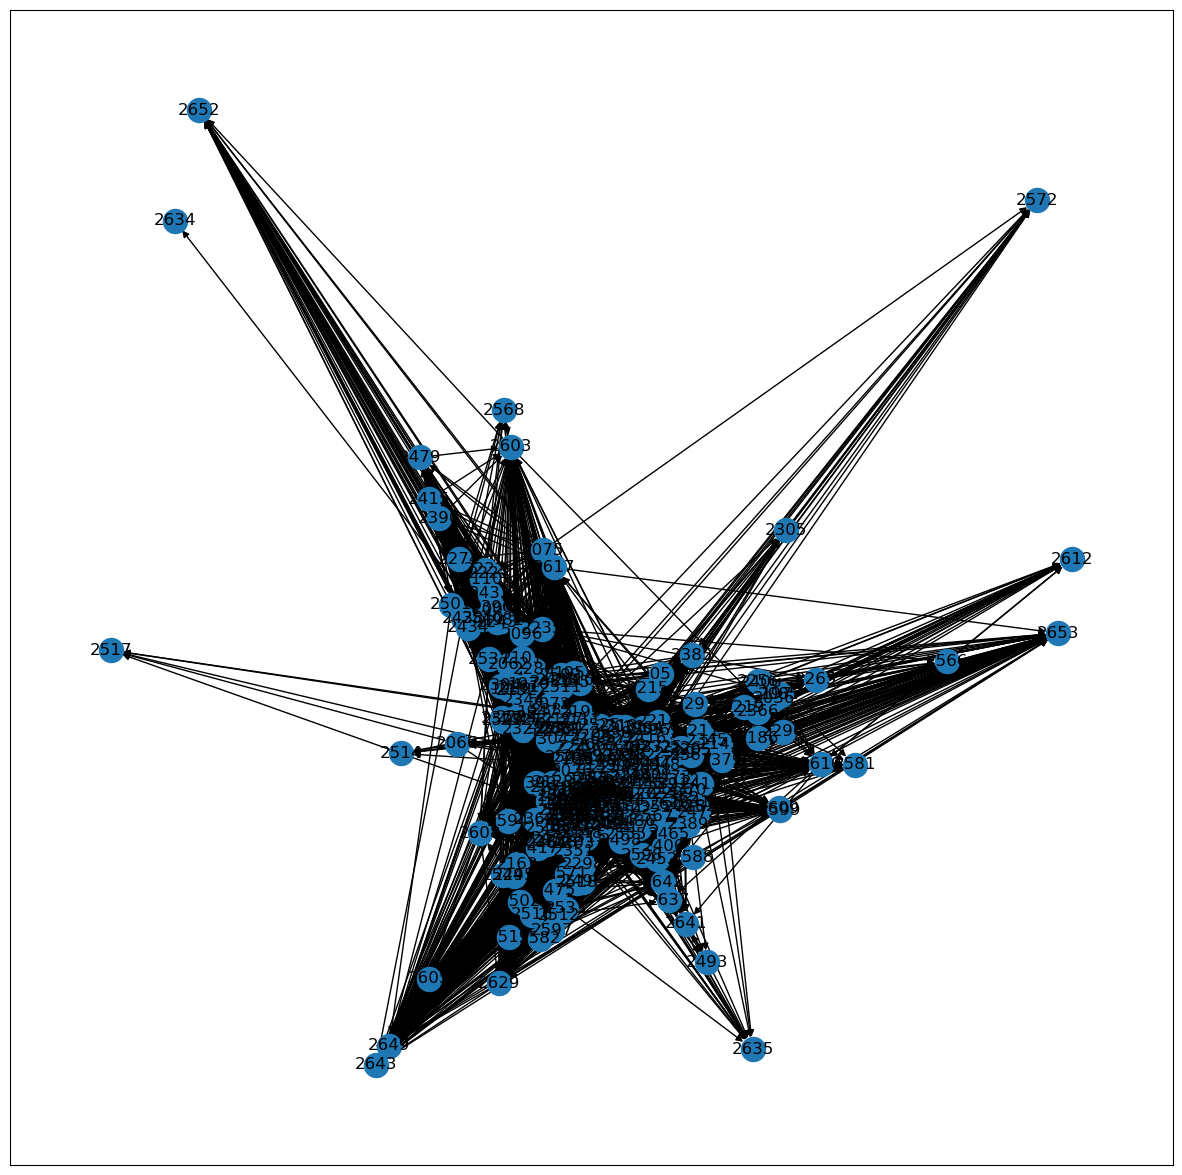

In [23]:
plot_graphs(graphs)

In [24]:
# calculating top N
def topN(graph, n, degree=False, close=False, between=False, eigen=False):
    if degree == True:
        word = "Degree"
        measures = nx.degree_centrality(graph)
        
    elif close == True:
        word = "Closeness"
        measures = nx.closeness_centrality(graph)
        
    elif between == True:
        word = "Betweenness"
        measures = nx.betweenness_centrality(graph)
        
    elif eigen == True:
        word = "Eigenvector"
        measures_in = nx.eigenvector_centrality(graph, max_iter=1000)
        measures_out = nx.eigenvector_centrality(graph.reverse(), max_iter=1000)
        
        measures = {}
        for key in measures_in.keys():
            measures[key] = (measures_in[key] + measures_out[key])/2
        
    top_nodes = nlargest(n, measures, key=measures.get)
    
    for i in top_nodes:
        print(f'Node {i}: {word} Centrality {measures[i]}')
    print("\n")
    return top_nodes

In [25]:
# top 5 degree centralities for each subgraph
sg5_deg = topN(sg5, 5, degree=True)
sg3_deg = topN(sg3, 5, degree=True)
sg2_deg = topN(sg2, 5, degree=True)

Node 1684: Degree Centrality 1.0
Node 3101: Degree Centrality 0.27842227378190254
Node 3291: Degree Centrality 0.27610208816705334
Node 2742: Degree Centrality 0.2691415313225058
Node 3082: Degree Centrality 0.2691415313225058


Node 107: Degree Centrality 1.0
Node 1800: Degree Centrality 0.677710843373494
Node 1663: Degree Centrality 0.6686746987951807
Node 1352: Degree Centrality 0.6566265060240964
Node 1730: Degree Centrality 0.641566265060241


Node 2111: Degree Centrality 0.674074074074074
Node 2384: Degree Centrality 0.674074074074074
Node 2047: Degree Centrality 0.625925925925926
Node 2199: Degree Centrality 0.6222222222222222
Node 2081: Degree Centrality 0.6148148148148148




In [26]:
# top 5 closeness centralities for each subgraph
sg5_close = topN(sg5, 5, close=True)
sg3_close = topN(sg3, 5, close=True)
sg2_close = topN(sg2, 5, close=True)

Node 3434: Closeness Centrality 0.47770571965859704
Node 3397: Closeness Centrality 0.4738012374323279
Node 3406: Closeness Centrality 0.4369007800469994
Node 3403: Closeness Centrality 0.4323803047100911
Node 3419: Closeness Centrality 0.41670995371171987


Node 1800: Closeness Centrality 0.685664769631289
Node 1827: Closeness Centrality 0.6548819713242108
Node 1833: Closeness Centrality 0.6532024960829866
Node 1835: Closeness Centrality 0.6387172064882908
Node 1804: Closeness Centrality 0.6300707416823256


Node 2598: Closeness Centrality 0.6383228926255633
Node 2649: Closeness Centrality 0.615820868945869
Node 2642: Closeness Centrality 0.6059710930442638
Node 2629: Closeness Centrality 0.5761562998405104
Node 2617: Closeness Centrality 0.5750611246943765




In [27]:
# top 5 betweenness centralities for each subgraph
sg5_bet = topN(sg5, 5, between=True)
sg3_bet = topN(sg3, 5, between=True)
sg2_bet = topN(sg2, 5, between=True)

Node 2951: Betweenness Centrality 0.012827308809200537
Node 3101: Betweenness Centrality 0.010470261599790543
Node 3154: Betweenness Centrality 0.010408366548461731
Node 3019: Betweenness Centrality 0.009885224306776866
Node 3214: Betweenness Centrality 0.00823084064539233


Node 1352: Betweenness Centrality 0.008462892852108496
Node 1471: Betweenness Centrality 0.006931615636648119
Node 1431: Betweenness Centrality 0.006481722891275275
Node 1199: Betweenness Centrality 0.0062453302173959046
Node 1399: Betweenness Centrality 0.005193349274081274


Node 2289: Betweenness Centrality 0.01679094611163723
Node 2384: Betweenness Centrality 0.013602408613304222
Node 2133: Betweenness Centrality 0.012552938382275437
Node 2325: Betweenness Centrality 0.010006604920236703
Node 2328: Betweenness Centrality 0.00870422100285729




In [28]:
# top 5 eigenvector centralities for each subgraph
sg5_eig = topN(sg5, 5, eigen=True)
sg3_eig = topN(sg3, 5, eigen=True)
sg2_eig = topN(sg2, 5, eigen=True)

Node 3434: Eigenvector Centrality 0.49713467358235247
Node 860: Eigenvector Centrality 0.4944835531347879
Node 1684: Eigenvector Centrality 0.07363908920920322
Node 3422: Eigenvector Centrality 0.039430605948082155
Node 3419: Eigenvector Centrality 0.020807662289964914


Node 107: Eigenvector Centrality 0.4958491010700637
Node 1900: Eigenvector Centrality 0.493064070363663
Node 1868: Eigenvector Centrality 0.08185045599827166
Node 920: Eigenvector Centrality 0.06100950866256826
Node 1842: Eigenvector Centrality 0.013461465641350758


Node 2649: Eigenvector Centrality 0.4944433680694499
Node 1465: Eigenvector Centrality 0.4941264802390732
Node 1577: Eigenvector Centrality 0.05501728279899283
Node 2643: Eigenvector Centrality 0.053024707471014926
Node 136: Eigenvector Centrality 0.05265858260802751




In [29]:
# list of colors for each node for distinct subgraphs
# nodes with top degree centralities are colord in red
color_deg_sg5 = ["red" if node in sg5_deg else "black" for node in sg5.nodes]
color_deg_sg3 = ["red" if node in sg3_deg else "black" for node in sg3.nodes]
color_deg_sg2 = ["red" if node in sg2_deg else "black" for node in sg2.nodes]

In [30]:
# list of colors for each node for distinct subgraphs
# nodes with top closeness centralities are colord in red
color_close_sg5 = ["red" if node in sg5_close else "black" for node in sg5.nodes]
color_close_sg3 = ["red" if node in sg3_close else "black" for node in sg3.nodes]
color_close_sg2 = ["red" if node in sg2_close else "black" for node in sg2.nodes]

In [31]:
# list of colors for each node for distinct subgraphs
# nodes with top betweenness centralities are colord in red
color_bet_sg5 = ["red" if node in sg5_bet else "black" for node in sg5.nodes]
color_bet_sg3 = ["red" if node in sg3_bet else "black" for node in sg3.nodes]
color_bet_sg2 = ["red" if node in sg2_bet else "black" for node in sg2.nodes]

In [32]:
# list of colors for each node for distinct subgraphs
# nodes with top eigenvector centralities are colord in red
color_eig_sg5 = ["red" if node in sg5_eig else "black" for node in sg5.nodes]
color_eig_sg3 = ["red" if node in sg3_eig else "black" for node in sg3.nodes]
color_eig_sg2 = ["red" if node in sg2_eig else "black" for node in sg2.nodes]

In [33]:
# plotting with highlighted colors
def plot_function(graph_list, color_list):
    
    for g, c in zip(graph_list, color_list):
        options = {
            "with_labels": False,
            "node_size": 100,
            "node_color": c,
            "edgecolors": "black",
            "linewidths": 0.7,
            "width": 0.35,
        }
        
        plt.figure(figsize=(15, 15))
        nx.draw_networkx(g, **options)
    plt.show()

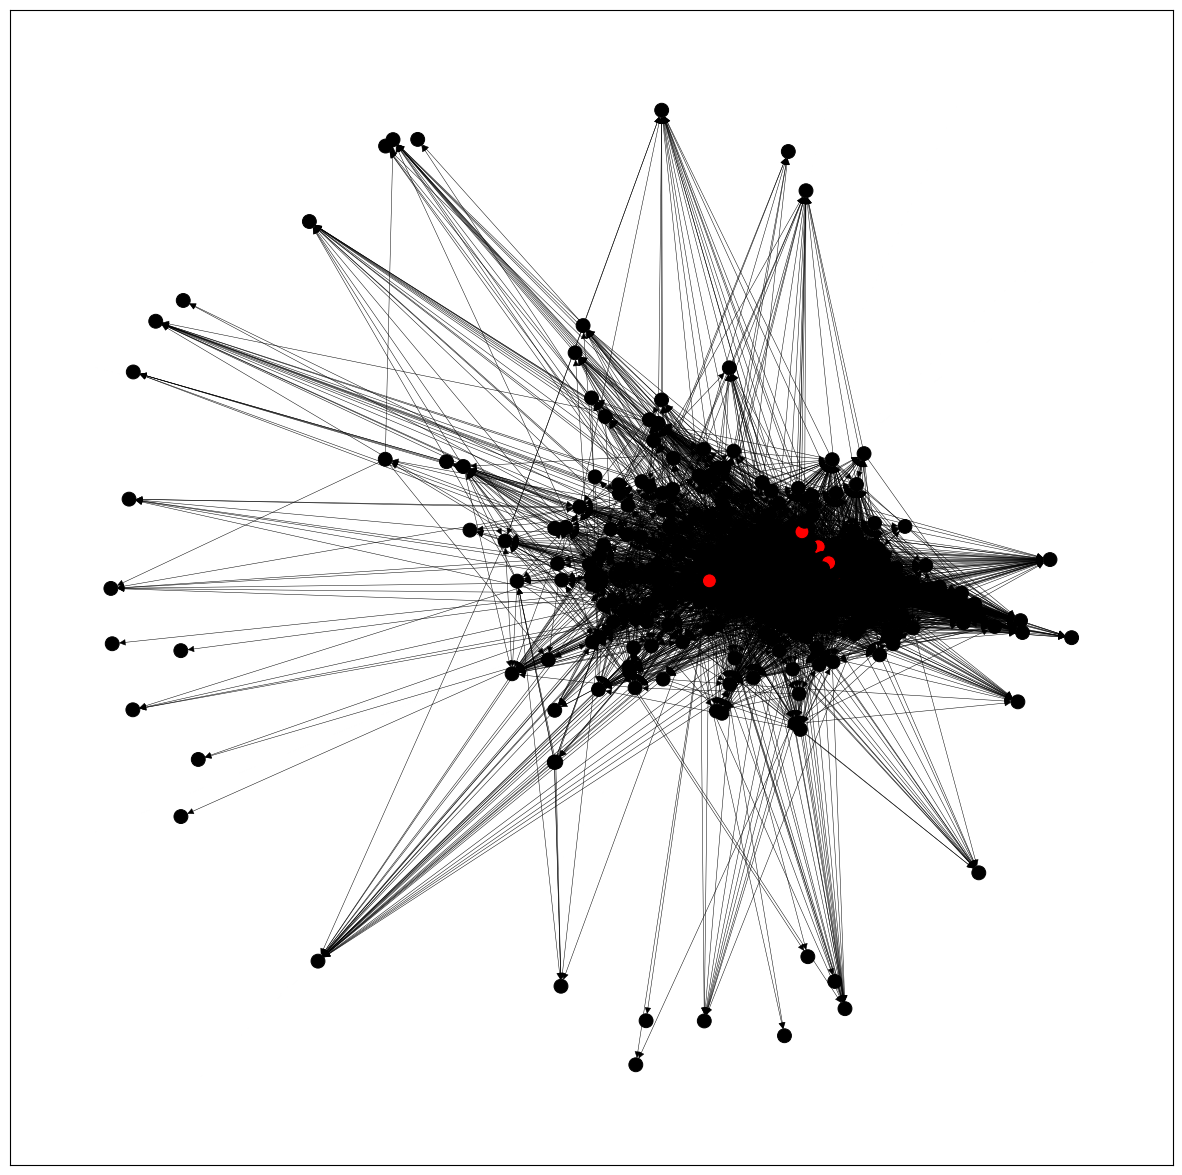

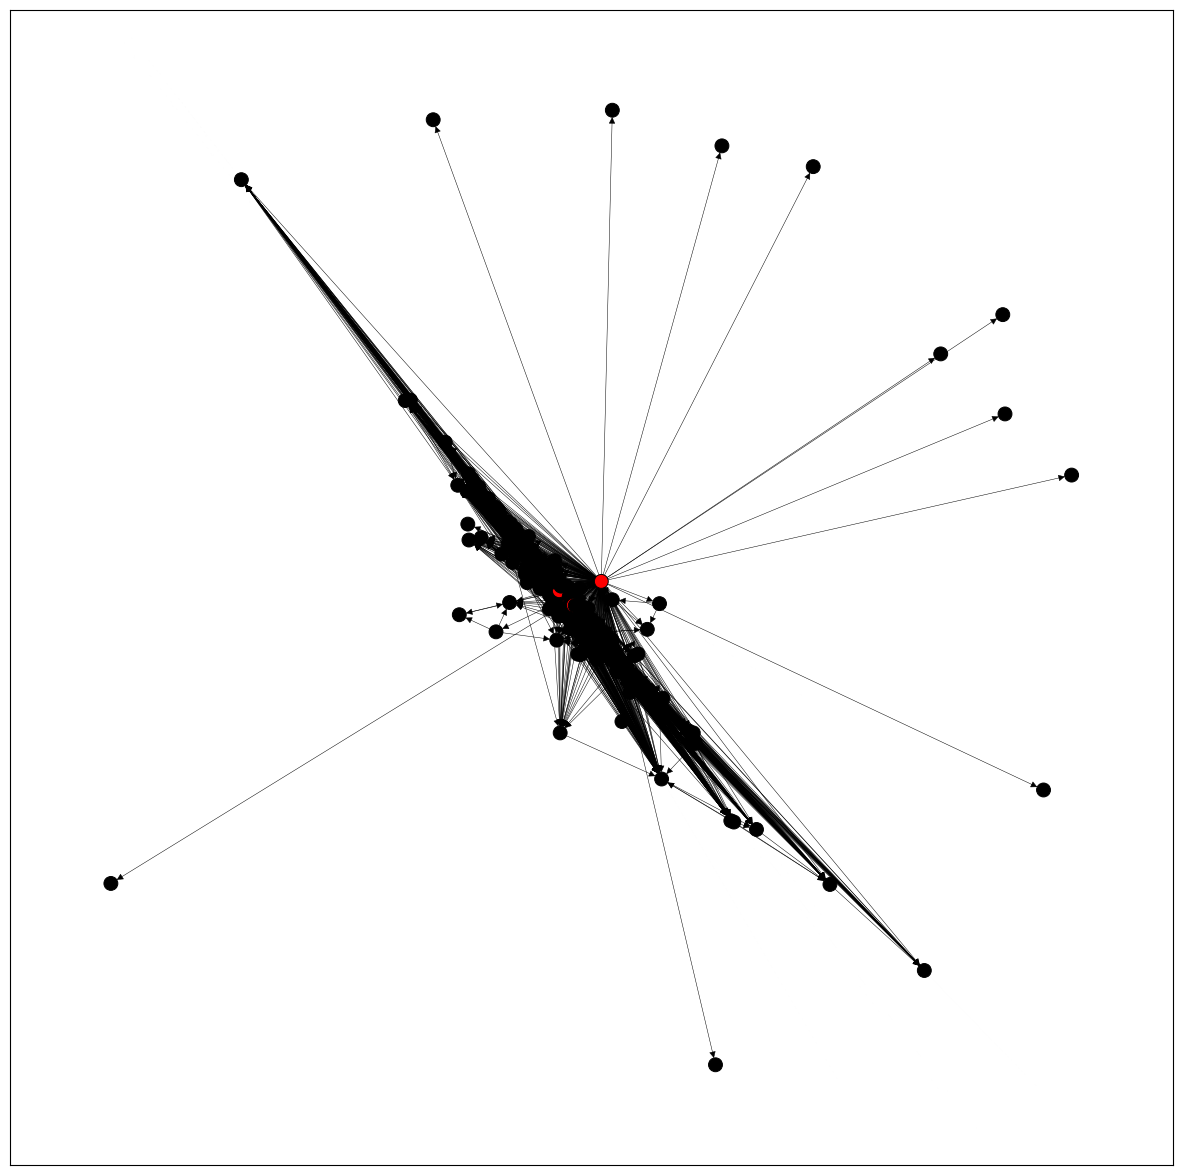

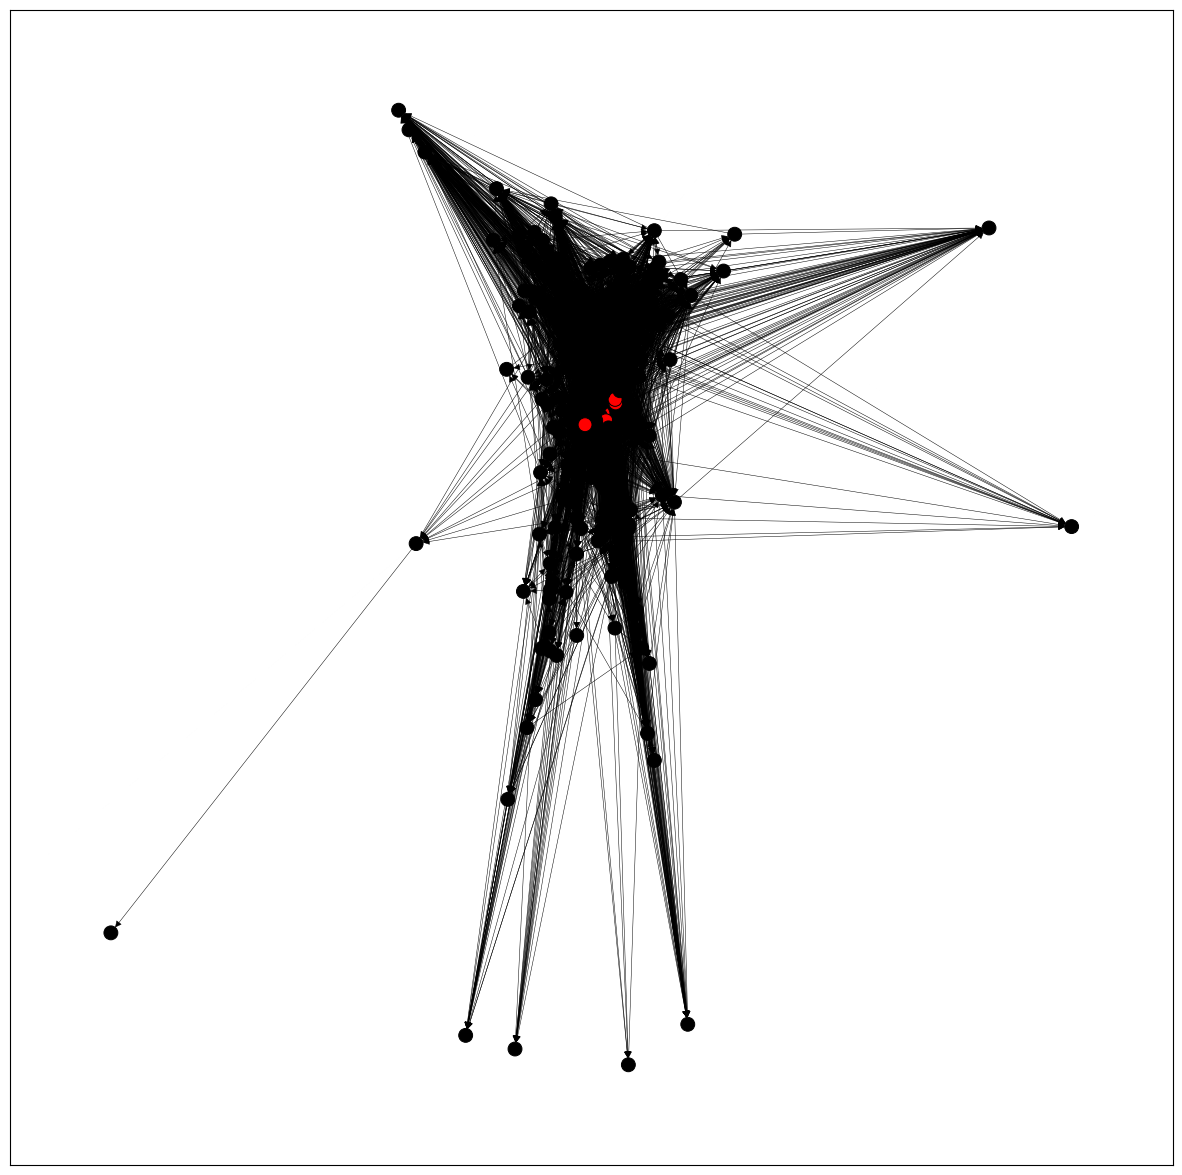

In [34]:
# degree centralities
plot_function(graphs, [color_deg_sg5, color_deg_sg3, color_deg_sg2])

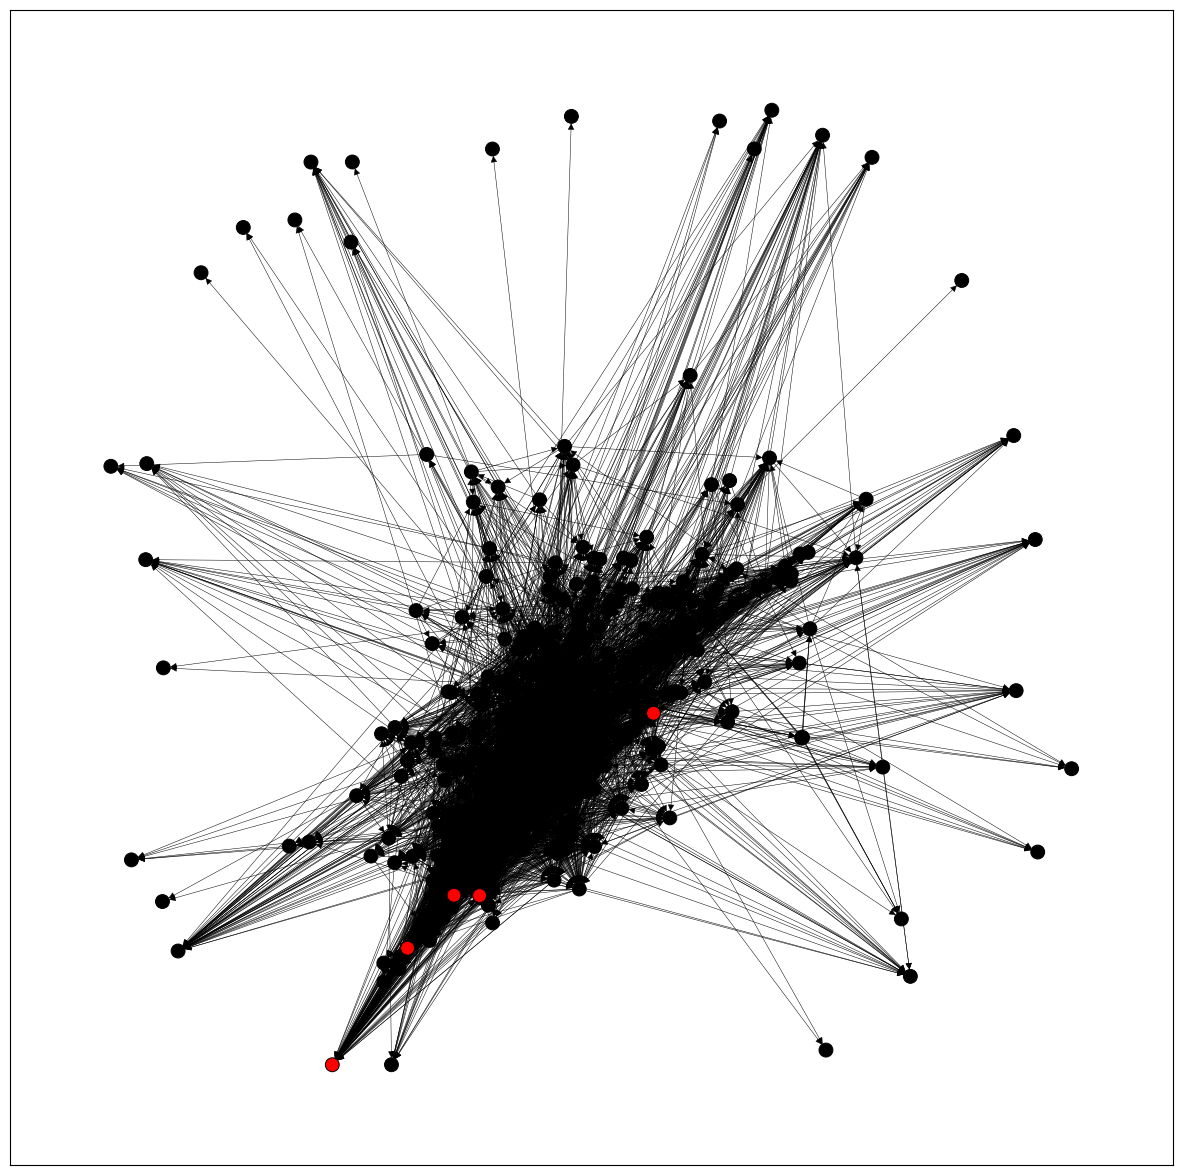

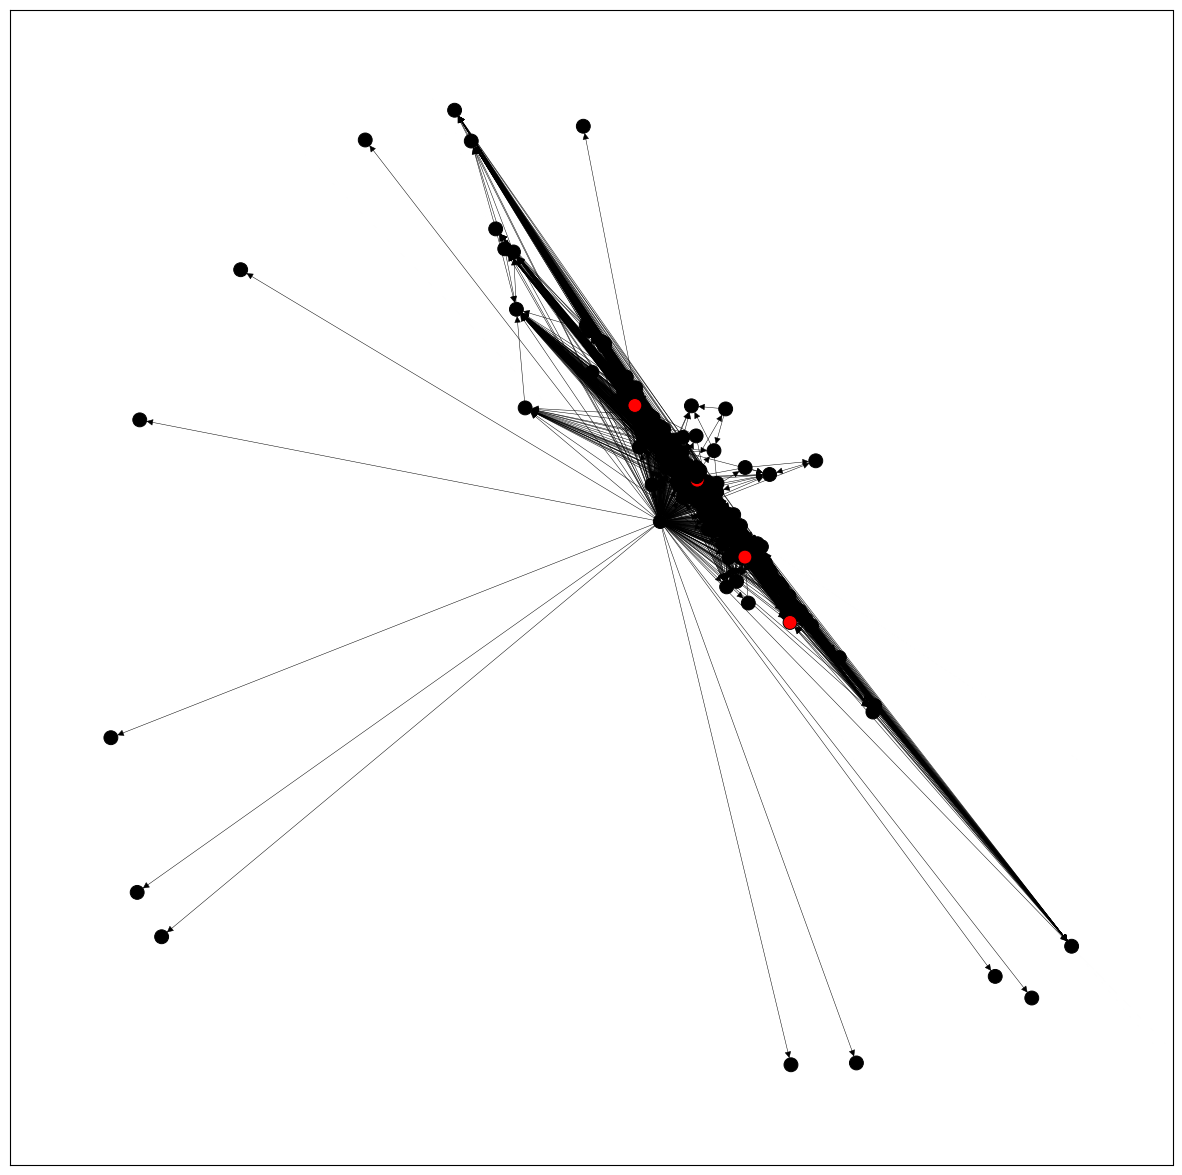

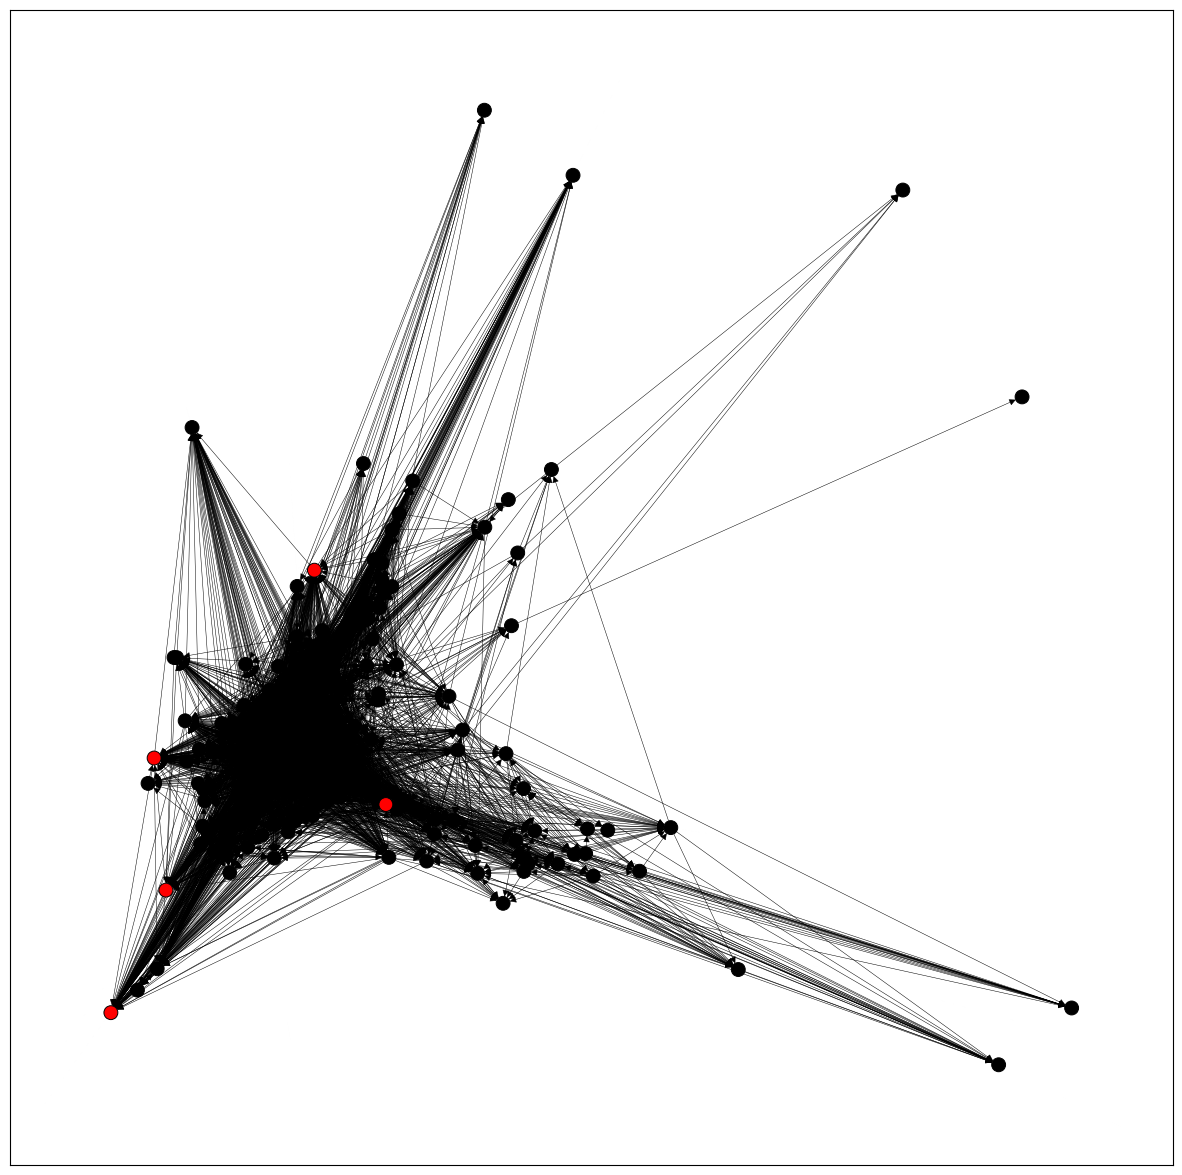

In [35]:
# closeness centralities
plot_function(graphs, [color_close_sg5, color_close_sg3, color_close_sg2])

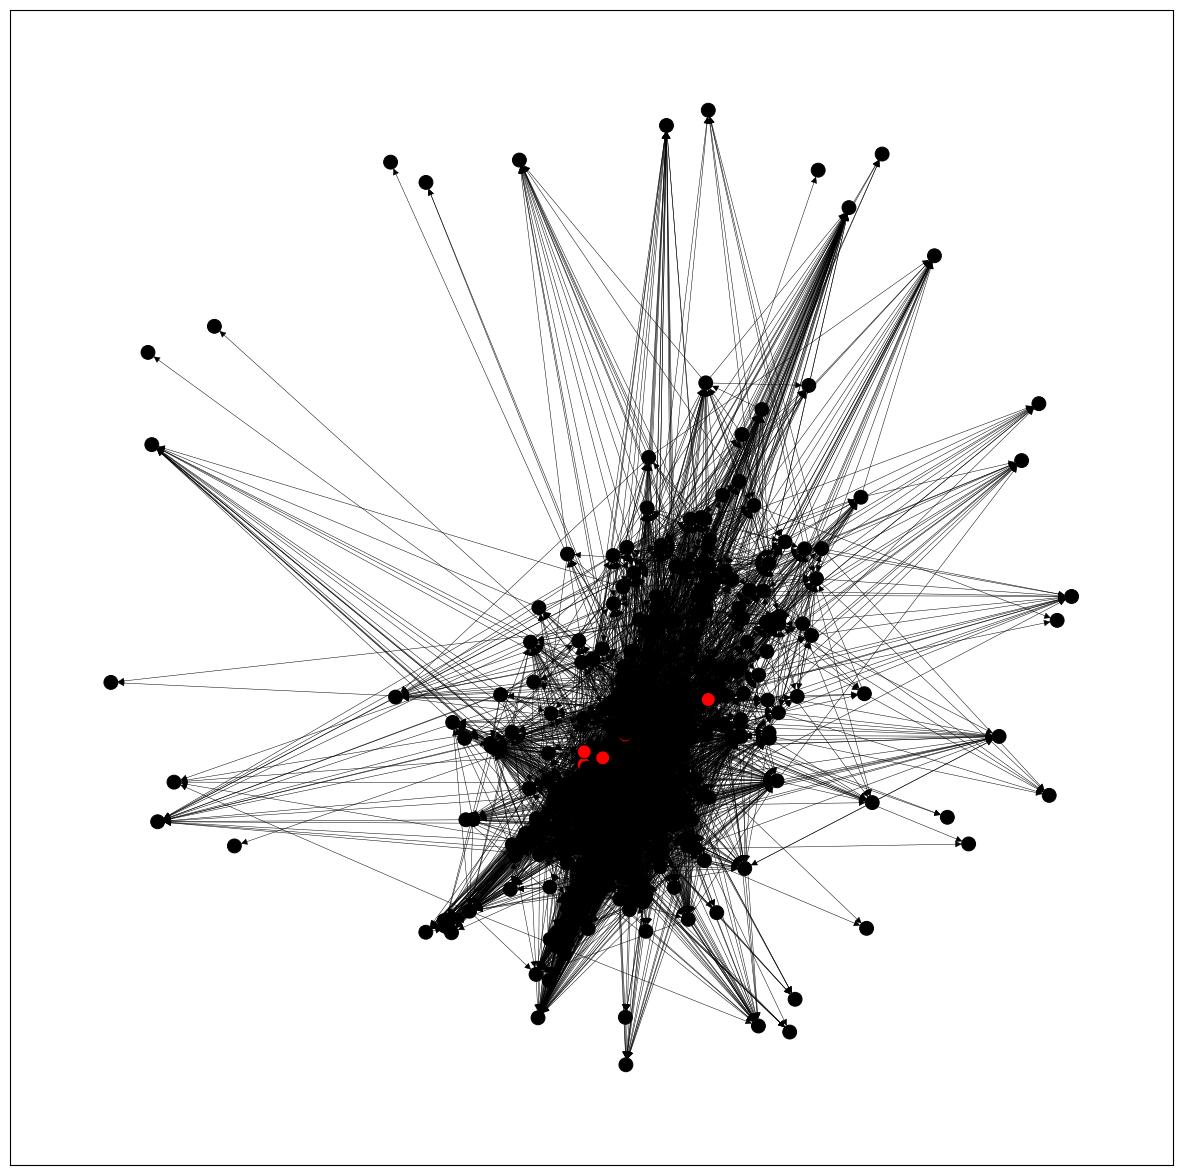

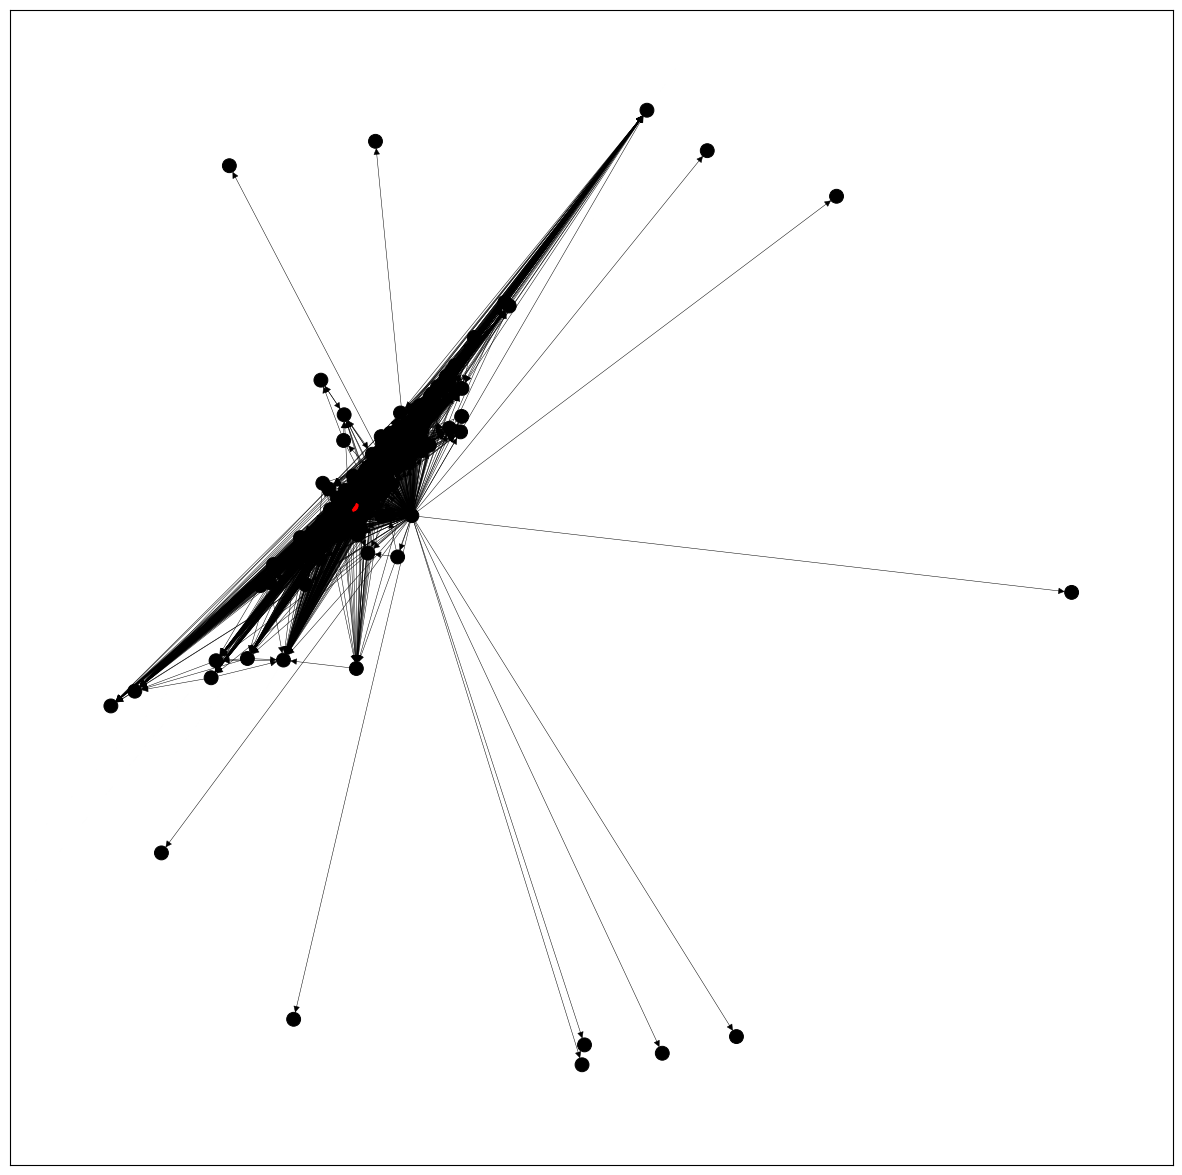

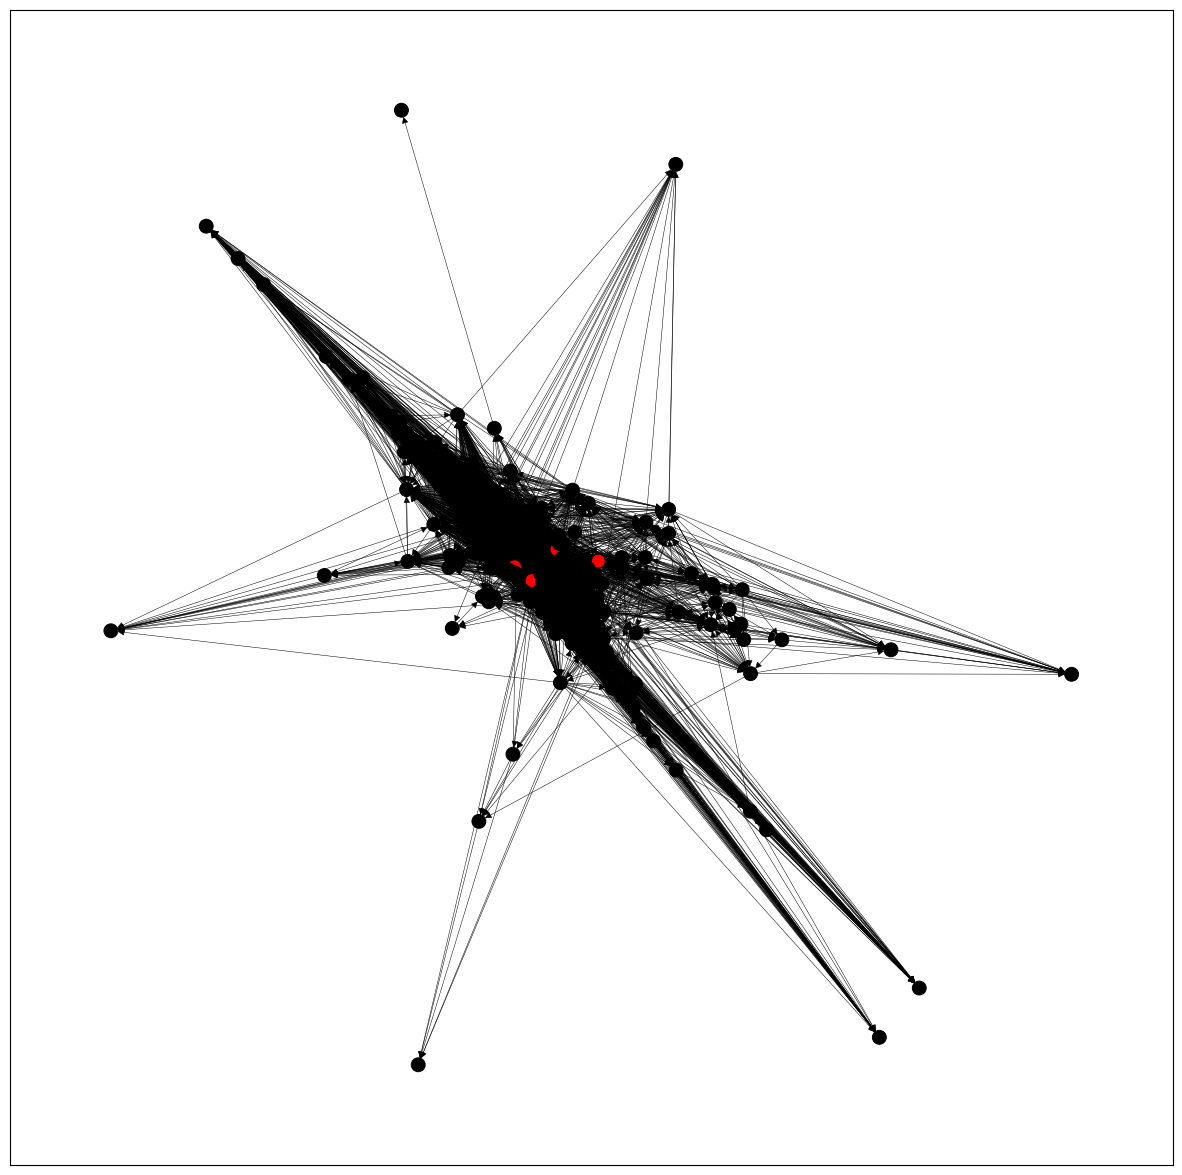

In [36]:
# betweenness centralities
plot_function(graphs, [color_bet_sg5, color_bet_sg3, color_bet_sg2])

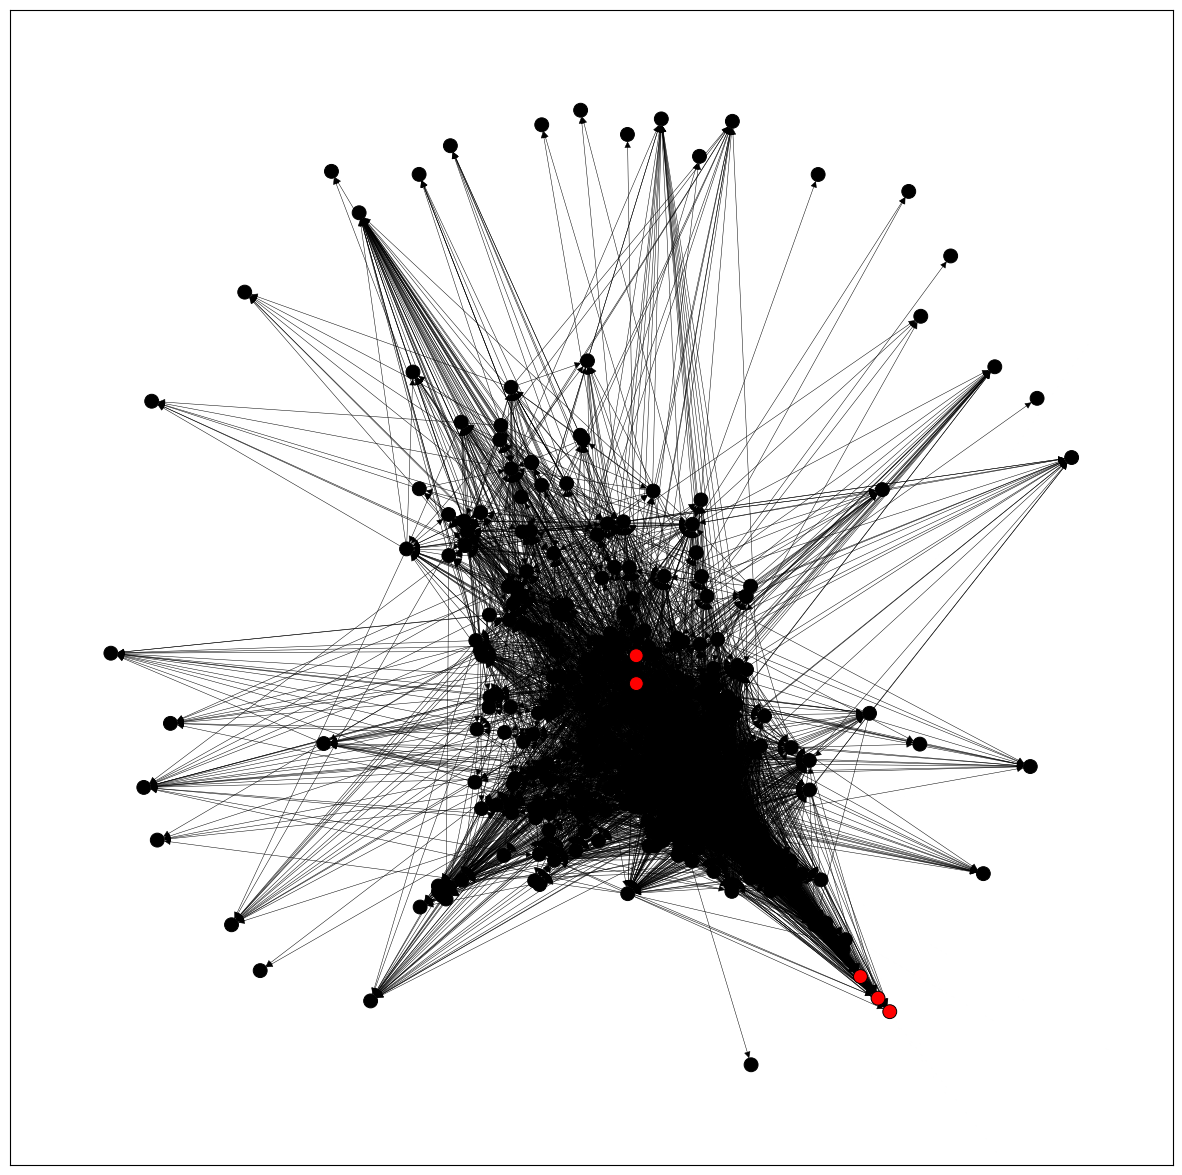

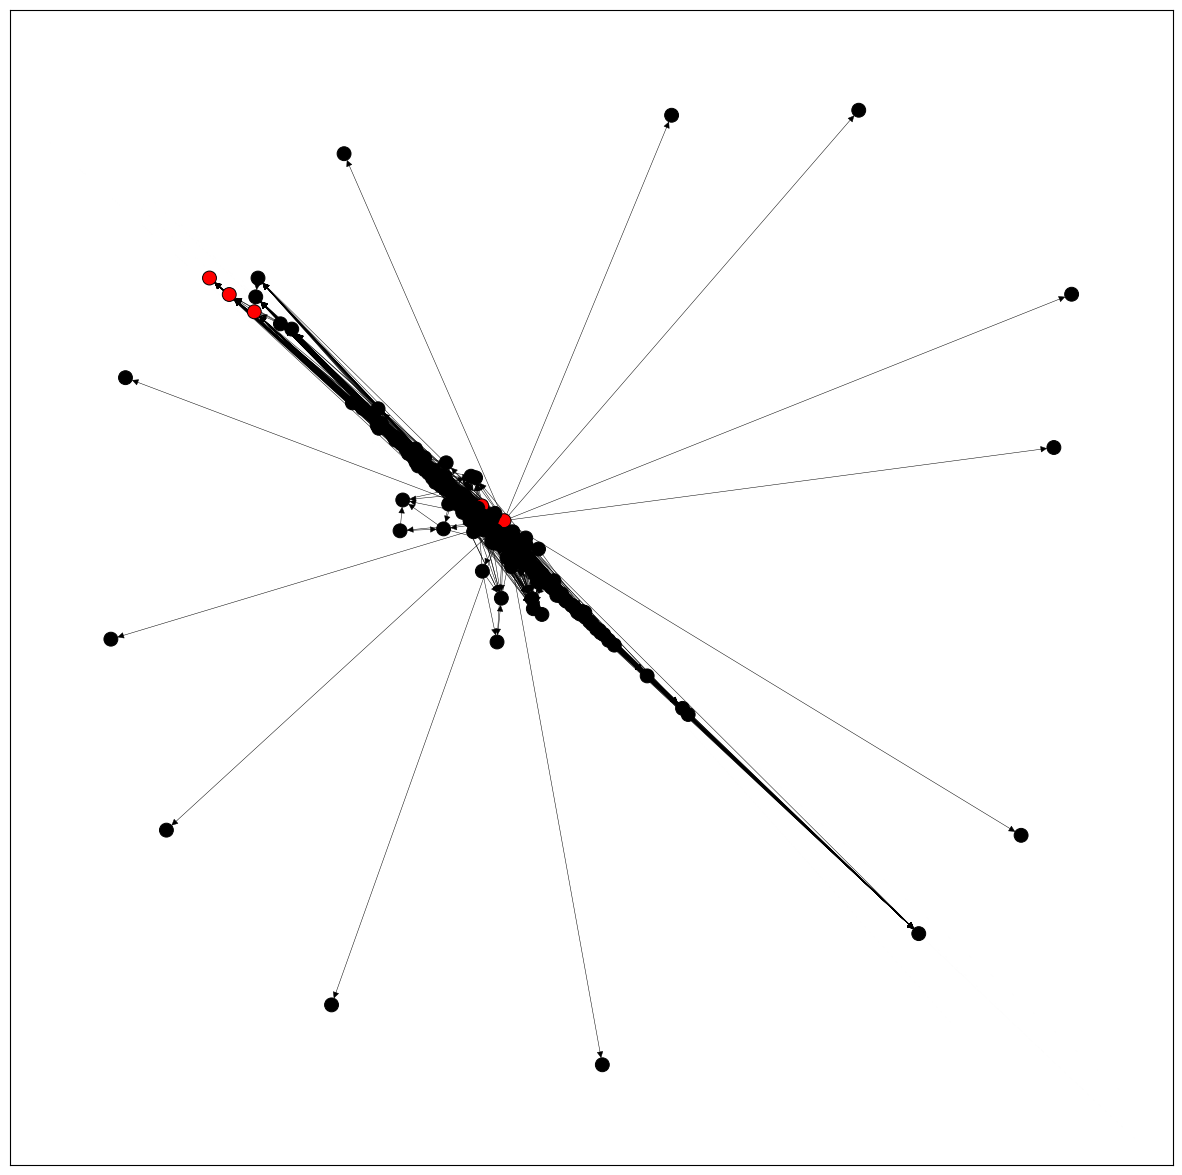

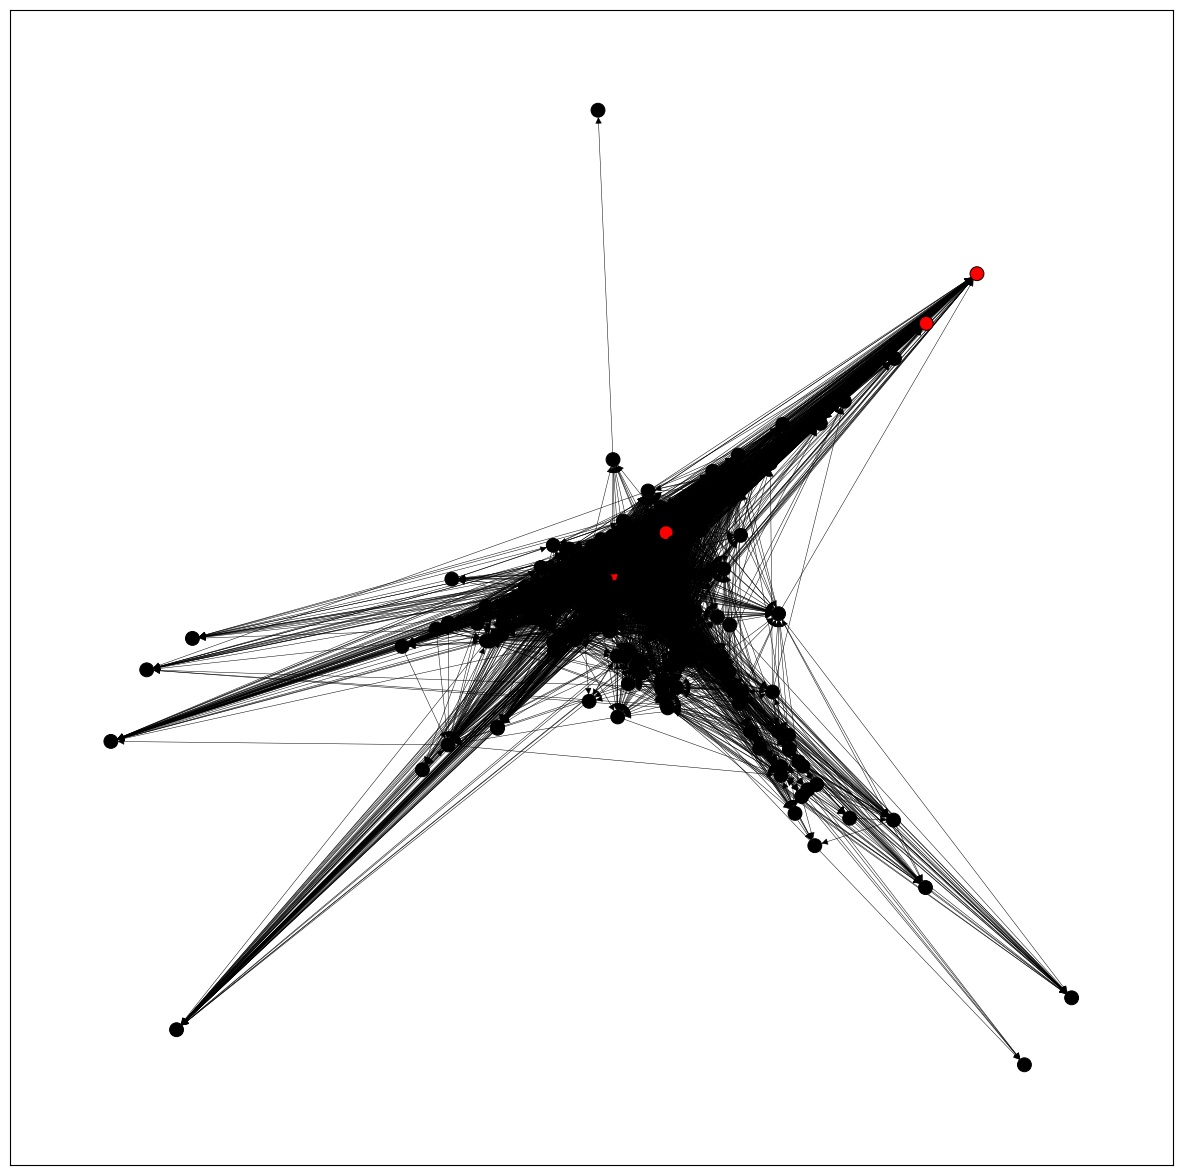

In [37]:
# peigenvector centralities
plot_function(graphs, [color_eig_sg5, color_eig_sg3, color_eig_sg2])

In [38]:
# 10
# influencers
infl_sg5 = list(set(sg5_close + sg5_bet))
infl_sg3 = list(set(sg3_close + sg3_bet))
infl_sg2 = list(set(sg2_close + sg2_bet))

# coloring influencers in red
color_infl_sg5 = ["red" if node in infl_sg5 else "black" for node in sg5.nodes]
color_infl_sg3 = ["red" if node in infl_sg3 else "black" for node in sg3.nodes]
color_infl_sg2 = ["red" if node in infl_sg2 else "black" for node in sg2.nodes]

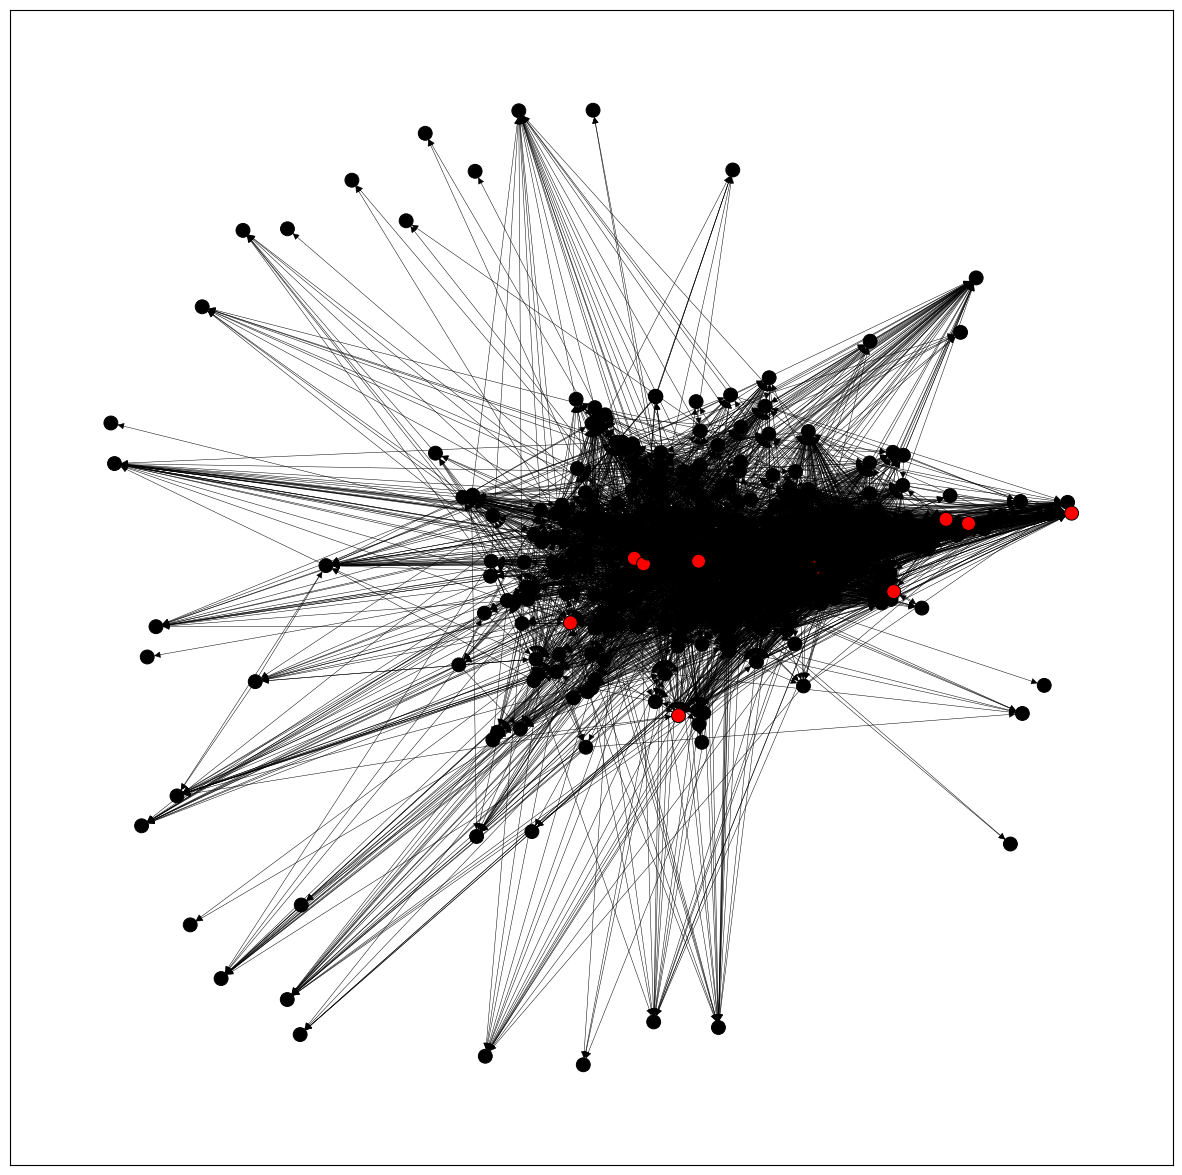

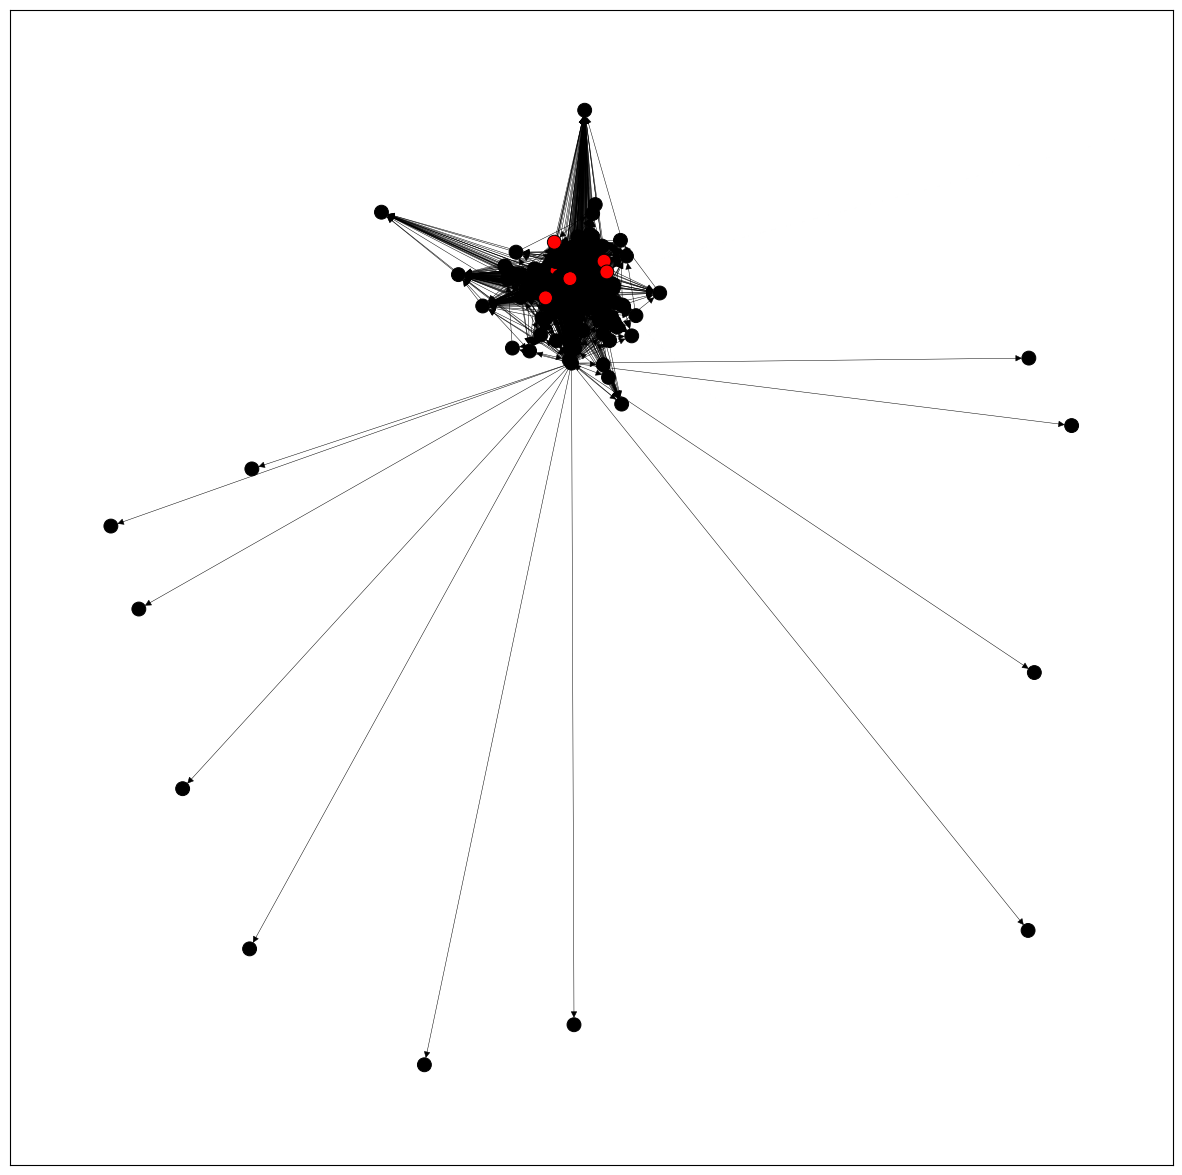

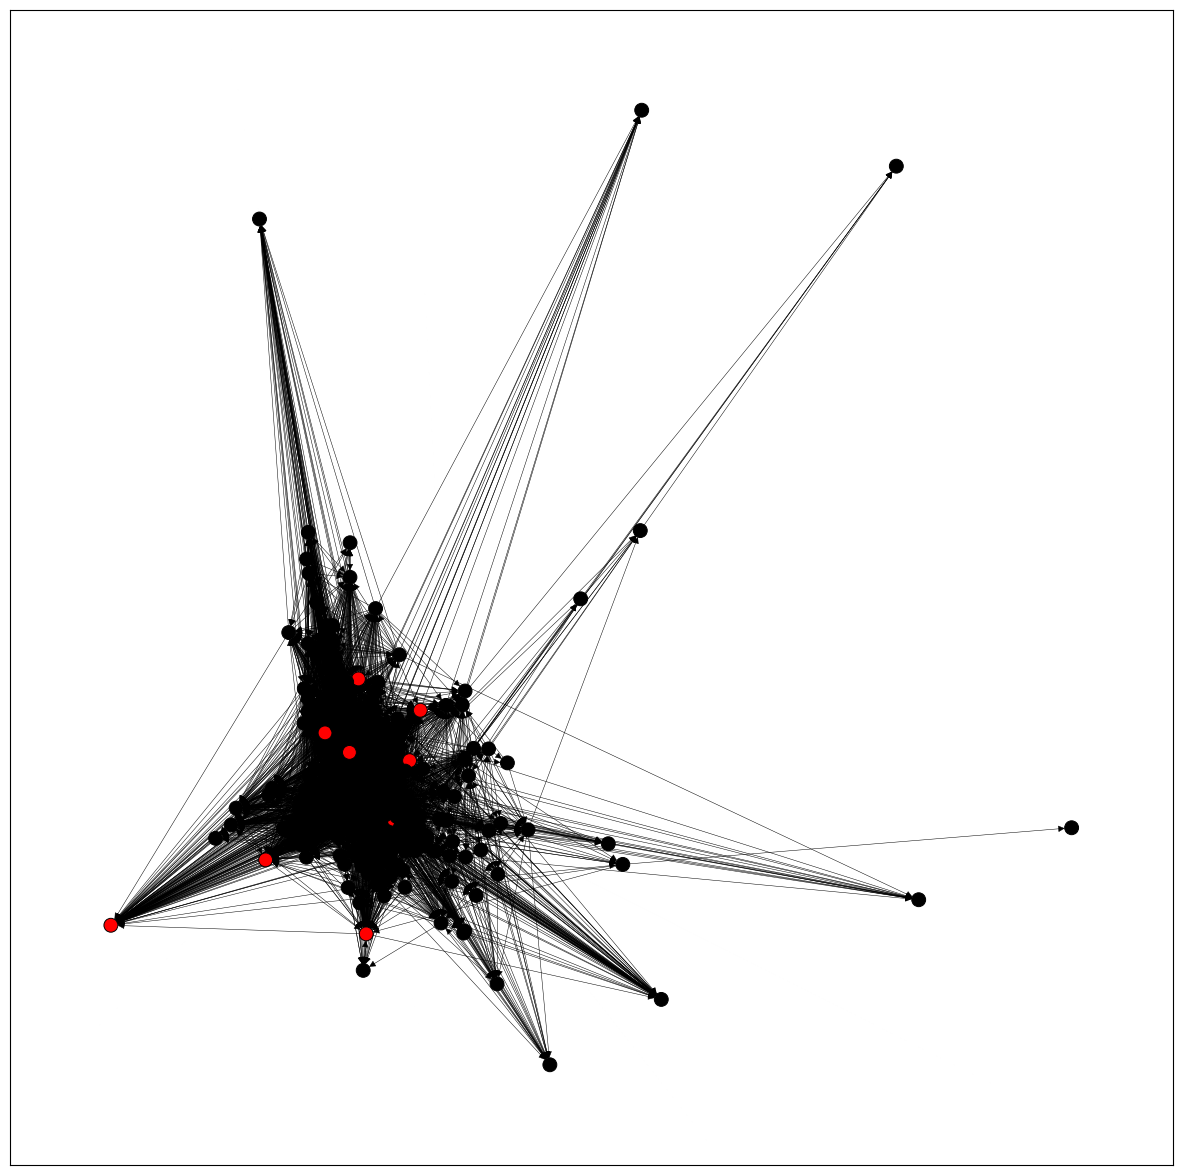

In [39]:
plot_function(graphs, [color_infl_sg5, color_infl_sg3, color_infl_sg2])

In [40]:
# 11

### Action Plan for Hypothetical Telecom Business

**Objective:** Increase brand awareness and customer engagement within the identified communities.

### 1. Define Target Audience

Given the network analysis, the top 5 nodes with the highest degrees, incoming degrees, outgoing degrees, closeness centrality, betweenness centrality, and eigenvector centrality are crucial for targeting. These nodes represent highly connected individuals in different communities.

- Target individuals in Community 5, especially focusing on Node 1684 with the highest degree centrality.
- Target individuals in Community 3, focusing on Node 107 with the highest degree centrality.
- Target individuals in Community 2, focusing on Node 2111 with the highest degree centrality.

### 2. Marketing Budget Allocation

Allocate the hypothetical marketing budget to maximize impact within the identified communities. Consider a balanced distribution across online and offline channels, with a focus on digital platforms given the nature of the telecom industry.

- **Total Hypothetical Marketing Budget:** $100,000

- **Allocation:**
  - Digital Marketing: 60,000
  - Traditional Marketing: 20,000
  - Community Engagement Initiatives: 20,000

### 3. Cost per Action (Advertisement Cost)

Determine the cost per action for each marketing channel to optimize the budget and ensure efficient resource utilization.

- **Digital Marketing:**
  - Cost per Click: 1.50
  - Cost per Mille: 5.00
  - Cost per Acquisition: 15.00

- **Traditional Marketing:**
  - Cost per Billboard: 500 per month
  - Cost per Event Participation: 2,000 per event

- **Community Engagement Initiatives:**
  - Cost per Sponsorship: 5,000
  - Cost per Partnership: 3,000

### 4. Marketing Strategies

Implement targeted marketing strategies to engage the identified communities effectively.

- **Digital Marketing:**
  - Run targeted social media campaigns, emphasizing the unique selling propositions of the telecom services.
  - Collaborate with influencers popular among the identified communities.

- **Traditional Marketing:**
  - Place strategically located billboards in areas with high community presence.
  - Participate in local events and sponsor activities that resonate with the communities.

- **Community Engagement Initiatives:**
  - Sponsor community events and provide exclusive offers to attendees.
  - Establish partnerships with local businesses to offer joint promotions.

### 5. Measure and Optimize

Regularly monitor key performance indicators (KPIs) such as brand mentions, website traffic, and customer acquisition within the targeted communities. Adjust the marketing strategies based on the performance metrics to ensure optimal results.

By aligning marketing efforts with the identified network communities, the hypothetical telecom business can enhance brand visibility and foster strong connections within its target audience.